Mean Shift

Mean shift is a ckustering technique in which piror knowledge of clusters is not required to know.
It does not assume any predefined shape on the clusters.It is based on Kernel Density Estimation.It works by groupin
together the data points based on weighted average.The weighted average is determined with the help of kernel function.It assigns the datapoints to the clusters by iteratively shifting them towards mode.

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

import matplotlib.pylab as pylab

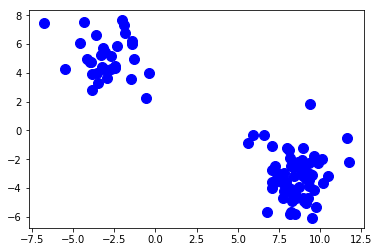

In [3]:
X, y = make_blobs(100, 2, centers=3, cluster_std=1.3)

plt.plot(X[:,0], X[:,1], 'bo', markersize = 10)

In [4]:
def distance_btw_dataPt_centroid(x, xi):
    return np.sqrt(np.sum((x - xi)**2))

def neighbour_points(X, x_centroid, distance = 5):
    neighbouring_pts = []
    for x in X:
        distance_between = distance_btw_dataPt_centroid(x, x_centroid)
        
        if distance_between <= distance:
            neighbouring_pts.append(x)
    return neighbouring_pts

def kernel_function(distance, bandwidth):
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return val

distance_for_neighbours = 6  
bandwidth = 4

In [5]:
X_present=np.copy(X)

X_past = []
n_iterations = 10
for i in range(n_iterations): #total num of iterations
        

    for i, x in enumerate(X): #iteration on each datapoint
        
        neighbours = neighbour_points(X_present, x, distance_for_neighbours)
        
      #calculating kernel function for each data point
        numerator = 0
        denominator = 0
        for neighbour in neighbours:
            distance = distance_btw_dataPt_centroid(neighbour, x)
            weight = kernel_function(distance, bandwidth)
            numerator += (weight * neighbour)
            denominator += weight
        
        new_x = numerator / denominator
        
     
        X_present[i] = new_x
    
    
    X_past.append(np.copy(X_present))


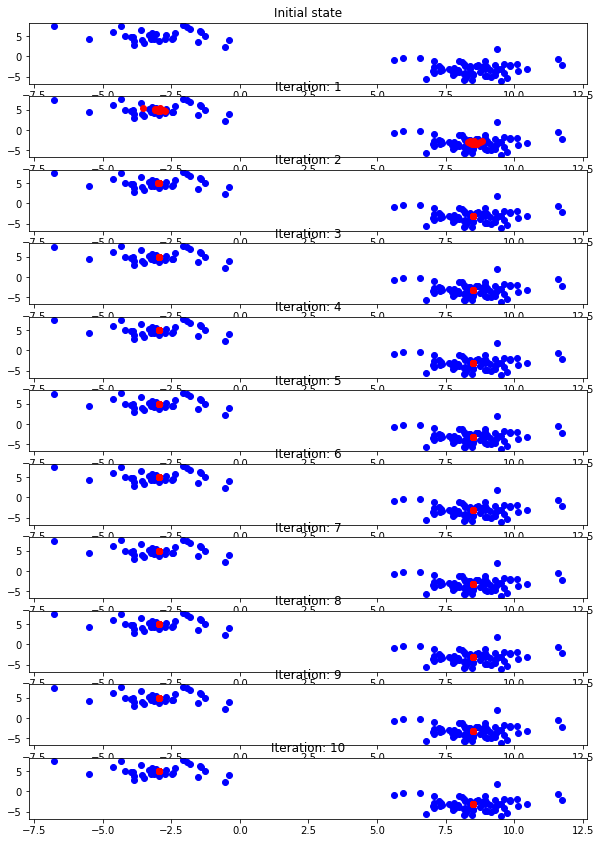

In [6]:
figure = plt.figure(1)
figure.set_size_inches((10, 16))
plt.subplot(n_iterations + 2, 1, 1)
plt.title('Initial state')
plt.plot(X[:,0], X[:,1], 'bo')
#plt.plot(X[:,0], X[:,1], 'ro')

for i in range(n_iterations):
    figure_index = i + 2
    plt.subplot(n_iterations + 2, 1, figure_index)
    plt.title('Iteration: %d' % (figure_index - 1))
    plt.plot(X[:,0], X[:,1], 'bo')
    plt.plot(X_past[i][:,0],X_past[i][:,1], 'ro')

In [7]:
from sklearn.cluster import MeanShift,estimate_bandwidth

In [8]:
bandwidth=estimate_bandwidth(X,quantile=0.1,n_samples=len(X))
print(bandwidth)
ms = MeanShift(bandwidth,bin_seeding=True)

1.3017904066097625


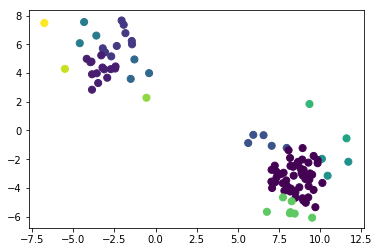

In [9]:
ms.fit(X)
y_target=ms.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_target,s=50)
